# Covid Data Project

Project: Covid Data

data cleaning, data analysis, visualisation

pandas, numpy, matplotlib

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:\\Users\\Marta Espinosa\\Desktop\\python\\sophie\\day 7 pandas and project\\covid-data.csv", on_bad_lines='skip',sep = ';',low_memory=False)
df.head()
df['location'].unique().shape

(248,)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244611 entries, 0 to 244610
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    244611 non-null  object 
 1   continent                                   230859 non-null  object 
 2   location                                    244611 non-null  object 
 3   date                                        244611 non-null  object 
 4   total_cases                                 230550 non-null  float64
 5   new_cases                                   230254 non-null  float64
 6   new_cases_smoothed                          229055 non-null  object 
 7   total_deaths                                211113 non-null  float64
 8   new_deaths                                  211039 non-null  float64
 9   new_deaths_smoothed                         209853 non-null  object 
 

In [4]:
# There are some nan (null) values for the continent Column  

df.continent.unique()

array(['Asia', nan, 'Europe', 'Africa', 'North America', 'South America',
       'Oceania'], dtype=object)

In [5]:
# The values where the continent is null reflects regions (e.g. World, Africa,...) NOT countries
df[df['continent'].isnull()]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
1033,OWID_AFR,NaN,Africa,2020-02-13,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1.426737e+09,NaN,NaN,NaN,NaN
1034,OWID_AFR,NaN,Africa,2020-02-14,1.0,1.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1.426737e+09,NaN,NaN,NaN,NaN
1035,OWID_AFR,NaN,Africa,2020-02-15,1.0,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1.426737e+09,NaN,NaN,NaN,NaN
1036,OWID_AFR,NaN,Africa,2020-02-16,1.0,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1.426737e+09,NaN,NaN,NaN,NaN
1037,OWID_AFR,NaN,Africa,2020-02-17,1.0,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1.426737e+09,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241601,OWID_WRL,NaN,World,2022-12-18,653118771.0,282702.0,"587635,571",6665869.0,674.0,"1794,714",...,"34,635","60,13","2,705","72,58","0,737",7.975105e+09,NaN,NaN,NaN,NaN
241602,OWID_WRL,NaN,World,2022-12-19,653723600.0,604829.0,"588852,143",6667572.0,1703.0,"1797,571",...,"34,635","60,13","2,705","72,58","0,737",7.975105e+09,NaN,NaN,NaN,NaN
241603,OWID_WRL,NaN,World,2022-12-20,654426926.0,703326.0,"579245,714",6669692.0,2120.0,"1834,286",...,"34,635","60,13","2,705","72,58","0,737",7.975105e+09,NaN,NaN,NaN,NaN
241604,OWID_WRL,NaN,World,2022-12-21,655130683.0,703757.0,"580825,429",6672108.0,2416.0,1828,...,"34,635","60,13","2,705","72,58","0,737",7.975105e+09,NaN,NaN,NaN,NaN


In [6]:
# Remove the rows with null values under 'continent' 
# This will result in only country data in the dataframe 


df = df.dropna(subset=['continent'])
df.continent.unique()

array(['Asia', 'Europe', 'Africa', 'North America', 'South America',
       'Oceania'], dtype=object)

# Part 1 – Cleaning

1. Remove the values under the ‘location’ column that aren’t individual countries

In [7]:
df[~df["continent"].isnull()]
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,"37,746","0,5","64,83","0,511",41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,"37,746","0,5","64,83","0,511",41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,"37,746","0,5","64,83","0,511",41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,"37,746","0,5","64,83","0,511",41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,"37,746","0,5","64,83","0,511",41128772.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244606,ZWE,Africa,Zimbabwe,2022-12-18,259356.0,0.0,0,5622.0,0.0,0,...,"30,7","36,791","1,7","61,49","0,571",16320539.0,NaN,NaN,NaN,NaN
244607,ZWE,Africa,Zimbabwe,2022-12-19,259356.0,0.0,0,5622.0,0.0,0,...,"30,7","36,791","1,7","61,49","0,571",16320539.0,NaN,NaN,NaN,NaN
244608,ZWE,Africa,Zimbabwe,2022-12-20,259981.0,625.0,"89,286",5637.0,15.0,"2,143",...,"30,7","36,791","1,7","61,49","0,571",16320539.0,NaN,NaN,NaN,NaN
244609,ZWE,Africa,Zimbabwe,2022-12-21,259981.0,NaN,NaN,5637.0,NaN,NaN,...,"30,7","36,791","1,7","61,49","0,571",16320539.0,NaN,NaN,NaN,NaN


2. Rename the ‘location’ column to ‘country’

In [8]:
df.rename(columns={'location': 'country'}, inplace=True)

3. Consider only the following columns: date, country, total cases, total deaths, total vaccinations.

In [9]:
new_df = df[['date', 'country', 'total_cases','total_deaths','total_vaccinations']]
new_df

,date,country,total_cases,total_deaths,total_vaccinations
0,2020-02-24,Afghanistan,5.0,NaN,NaN
1,2020-02-25,Afghanistan,5.0,NaN,NaN
2,2020-02-26,Afghanistan,5.0,NaN,NaN
3,2020-02-27,Afghanistan,5.0,NaN,NaN
4,2020-02-28,Afghanistan,5.0,NaN,NaN
...,...,...,...,...,...
244606,2022-12-18,Zimbabwe,259356.0,5622.0,NaN
244607,2022-12-19,Zimbabwe,259356.0,5622.0,NaN
244608,2022-12-20,Zimbabwe,259981.0,5637.0,NaN
244609,2022-12-21,Zimbabwe,259981.0,5637.0,NaN


# Part 2 - Analysing

a. What was the total number of vaccinations in Mexico on 21st March 2021

In [10]:
new_df.loc[(new_df['country'] == 'Mexico') & (new_df['date'] == '2021-03-21')]['total_vaccinations']

140145    5612291.0
Name: total_vaccinations, dtype: float64

b. What date did Uzbekistan register it’s first death?

In [11]:
Uzbekistan_death = new_df.loc[(new_df['country'] == 'Uzbekistan')]
Uzbekistan_death = Uzbekistan_death.dropna(subset=['total_deaths'])
Uzbekistan_death["date"].min()

'2020-03-27'

c. How many days between the first and last date of data?

In [12]:
first_date = Uzbekistan_death["date"].min()
last_date = Uzbekistan_death["date"].max()
print(f"first date with data about the deaths: {first_date}")
print(f"last date with data about the deaths: {last_date}")
first_date = pd.to_datetime(Uzbekistan_death['date']).min()
last_date = pd.to_datetime(Uzbekistan_death['date']).max()
diff = last_date - first_date
print(f"Days between the first and last date of data: {diff}")

first date with data about the deaths: 2020-03-27
last date with data about the deaths: 2022-12-22
Days between the first and last date of data: 1000 days 00:00:00


d. How many countries have had more than 1000000 deaths?

In [13]:
countries_more_than_1000000 = new_df[new_df.total_deaths > 1000000]
countries_more_than_1000000['country'].unique()

array(['United States'], dtype=object)

e. Find the top 5 countries with the highest number of total cases

In [14]:
top5_cases =new_df.groupby('country', as_index=False)['total_cases'].sum().sort_values(by = 'total_cases', ascending = False).head(5)
                                                                                                                                
top5_cases

,country,total_cases
221,United States,4.594309e+10
93,India,2.569045e+10
27,Brazil,1.835328e+10
71,France,1.298885e+10
76,Germany,1.080680e+10


# Part 3 – Visualising

4. Create a scatter graph which plots the total number of cases from each country

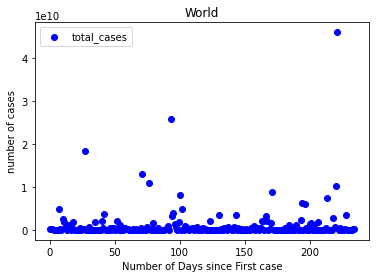

In [24]:
df4 = df.groupby(["country"])[["country", "total_cases","total_deaths"]].sum().reset_index()

plt.scatter(np.arange(0,len(df4)), df4['total_cases'],color='blue', marker= 'o', label='total_cases')
plt.ylabel("number of cases")
plt.xlabel("Number of Days since First case")
plt.title("World")
plt.legend()

5. Create a line graph that displays total cases and total deaths in Mexico

In [33]:
mexico_df = df.loc[(df['country'] == 'Mexico')][ ["date","total_cases","total_deaths"] ]
mexico_df = mexico_df.dropna()

Text(0.5, 1.0, 'Mexico')

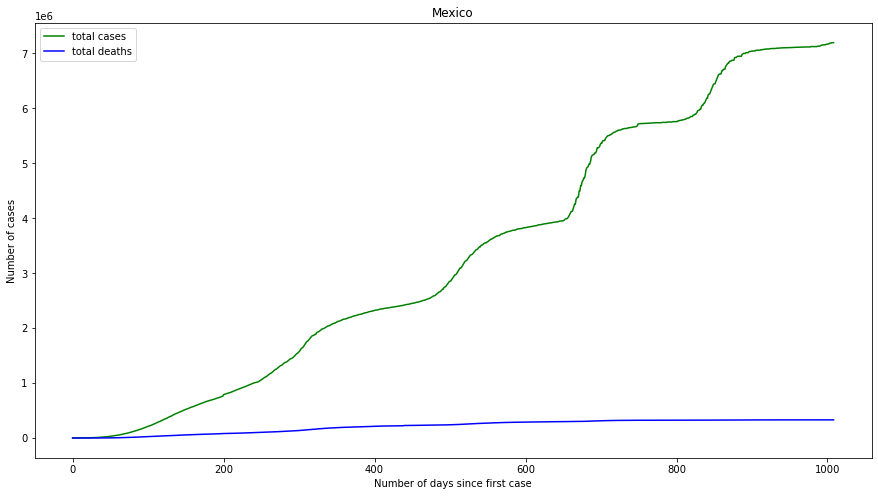

In [34]:
fix,ax = plt.subplots(1,1,figsize = (15,8))
                      
ax.plot(np.arange(0,len(mexico_df)), mexico_df["total_cases"],color = "green", label = "total cases")
ax.plot(np.arange(0,len(mexico_df)), mexico_df["total_deaths"],color = "blue", label = "total deaths")
                      
plt.xlabel("Number of days since first case")
plt.ylabel("Number of cases")
plt.legend()
plt.title("Mexico")

6. Repeat this for Taiwan, France and Australia (you will have 4 graphs outputted in total)

Text(0.5, 1.0, 'Mexico')

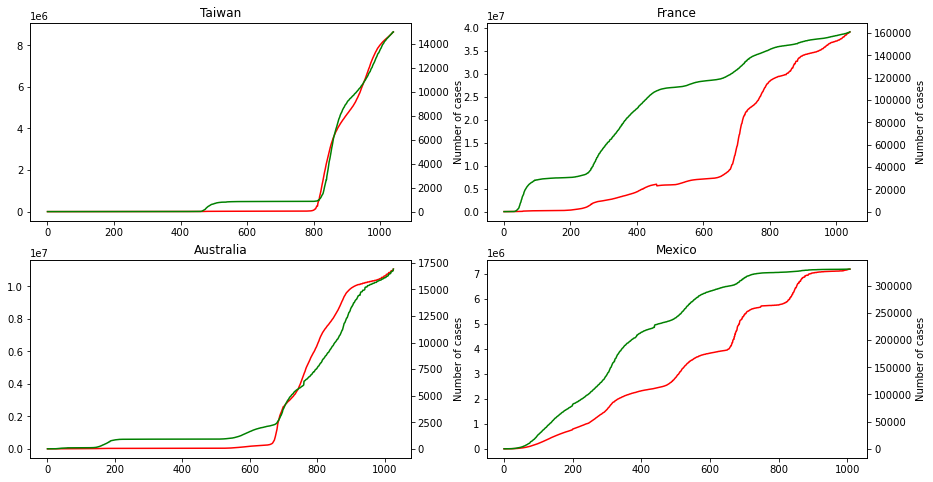

In [62]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))

taiwan_df = df.loc[(df['country'] == 'Taiwan')][ ["total_cases","total_deaths"] ]
taiwan_df = taiwan_df.dropna()
x_axis_taiwan = np.arange(0, len(taiwan_df))
y1_axis = taiwan_df["total_cases"] 
y2_axis = taiwan_df["total_deaths"]
ax[0, 0].plot(x_axis_taiwan, y1_axis, color = "red",)
ax[0,0].twinx().plot(x_axis_taiwan, y2_axis, color="green")

plt.xlabel("Number of days since first case")
plt.ylabel("Number of cases")
plt.title("Taiwan")


france_df = df.loc[(df['country'] == 'France')][ ["total_cases","total_deaths"] ]
france_df = france_df.dropna()
x_axis_france = np.arange(0, len(france_df))
y1_axis = france_df["total_cases"] 
y2_axis = france_df["total_deaths"]
ax[0, 1].plot(x_axis_france, y1_axis, color = "red")
ax[0,1].twinx().plot(x_axis_france, y2_axis, color = "green")

plt.xlabel("Number of days since first case")
plt.ylabel("Number of cases")
plt.title("France")

australia_df = df.loc[(df['country'] == 'Australia')][ ["total_cases","total_deaths"] ]
australia_df = australia_df.dropna()
x_axis_australia = np.arange(0, len(australia_df))
y1_axis = australia_df["total_cases"] 
y2_axis = australia_df["total_deaths"]
ax[1, 0].plot(x_axis_australia, y1_axis, color = "red")
ax[1,0].twinx().plot(x_axis_australia, y2_axis, color = "green")

plt.xlabel("Number of days since first case")
plt.ylabel("Number of cases")
plt.title("Australia")

mexico_df = df.loc[(df['country'] == 'Mexico')][ ["total_cases","total_deaths"] ]
mexico_df = mexico_df.dropna()
x_axis_mexico = np.arange(0, len(mexico_df))
y1_axis = mexico_df["total_cases"] 
y2_axis = mexico_df["total_deaths"]
ax[1, 1].plot(x_axis_mexico, y1_axis, color = "red")
ax[1,1].twinx().plot(x_axis_mexico, y2_axis, color = "green")

plt.xlabel("Number of days since first case")
plt.ylabel("Number of cases")
plt.title("Mexico")


7. Define the following list:
countries = [‘Mexico’, ‘Taiwan’, ‘France’, ‘Australia’]
Using the code from question 5, create a For loop that runs through the code and outputs a graph for each country in the countries list.
The output will be the same graphs from question 6, but in a more efficient manner.

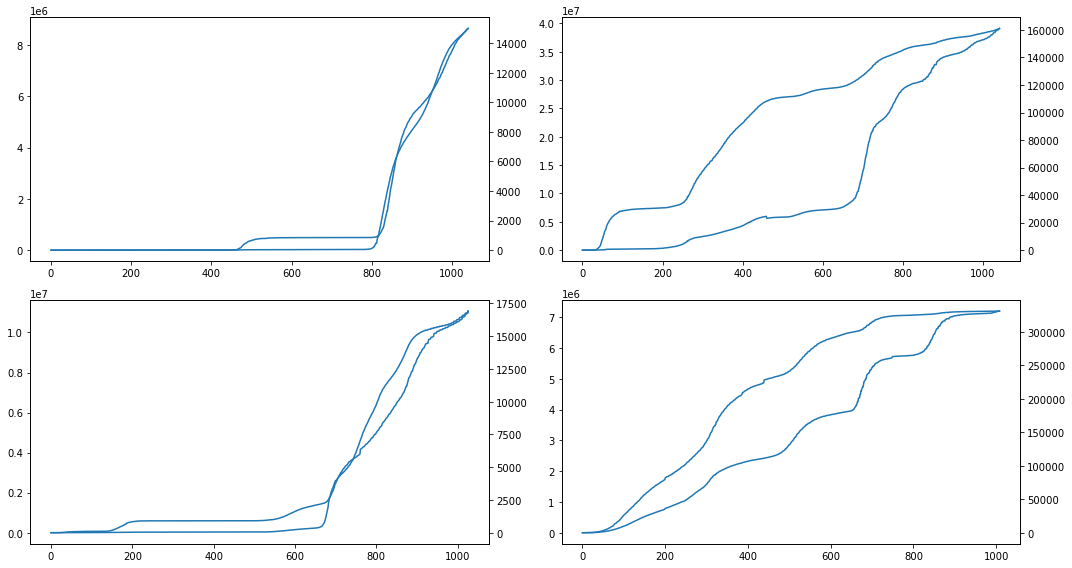

In [67]:
plot_x = 2
plot_y = 2

fig, ax = plt.subplots(plot_x, plot_y, figsize=(15,8))

# the first time the loop starts, x = 0 --> ['Mexico', 'Taiwan'] and y changes from 0 to 1
# the second time the loop starts, x = 1 --> ['France', 'Australia'] and y changes from 0 to 1
x = 0
for countries in [['Taiwan', 'France'], ['Australia', 'Mexico']]:
    y = 0
    for country in countries:
        country_df = df.loc[(df['country'] == country)][ ["total_cases","total_deaths"] ]
        country_df = country_df.dropna()
        x_axis_country = np.arange(0, len(country_df))
        y1_axis = country_df["total_cases"]
        y2_axis = country_df["total_deaths"]
        ax[x, y].plot(x_axis_country, y1_axis)
        ax[x, y].twinx().plot(x_axis_country, y2_axis)
        y += 1
    x += 1


plt.tight_layout() 
plt.show()